In [1]:
# from nv_utilities_v31 import *
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# import matplotlib as mpl
import io, base64
import numpy as np
from html_table import h_table
from time import time


In [2]:
# import mpl.pyplot
# ticker = matplotlib.ticker

In [3]:
base_style = {
    'figure.dpi':                   300,  # in a notebook, higher dpi makes the graph larger   
    'figure.figsize':  [3*1.6180339, 3],  # constrain the size and use the golden ratio to set the size
    'figure.facecolor':         'white',
    'figure.titlesize':               8,
    'axes.titlesize':                 8,  # the default font sizes have to be smaller bc of the higher dpi
    'axes.labelsize':                 6,
    'ytick.labelsize':                4,
    'xtick.labelsize':                4,
    'legend.fontsize':                5,
    'lines.linewidth':                1,
    'lines.markersize':               3,
    'xtick.major.size':             2.0,
    'xtick.major.width':            0.3,
    'ytick.major.size':             2.0,
    'ytick.major.width':            0.3,
}


def floating_spines(ax, axis = 'l'):
    """[summary]

    Parameters
    ----------
    ax : [type]
        [description]
    axis : str, optional
        [description], by default 'l'

    Returns
    -------
    [type]
        [description]
    """
    ax.spines['top'].set_visible(False)
    if axis == 'l':
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(True)
        ax.spines['left'].set_linewidth(0.2)
        ax.spines['left'].set_position(('outward', 5))
    else:
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(True)
        ax.spines['right'].set_linewidth(0.2)
        ax.spines['right'].set_position(('outward', 5))

    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['bottom'].set_position(('outward', 5))
    return ax


def ar(x: float, b: list, r: list)-> float:
    """
    Calculate the average tax rate

    Parameters
    ----------
    x, revenue 
    b, list of tax brackets
    r, corresponding list of tax rates 
    
    Returns
    -------
    average tax rate 
    """
    bl = b
    bu = (b[1:] + [np.inf])
    
    tp_bl = [0] + [ (bu[j]-bl[j]) * r[j] for j in range(0,len(b)-1) ]
    tp_cum = np.array(tp_bl).cumsum()

    a = 0
    for j in range(len(b)):
        if bl[j] < x and x <= bu[j]:
            a = ( (x - bl[j]) * r[j] + tp_cum[j] ) / x
    return a      

def us_revenue():
    """
    Returns a dict with company names as keys and a list of revenue 2018-2023 as value.
    """
    return {
        "Amazon":     [7405535228.00,10319981126.00,15734930757.00,20471812845.12,26203920441.75,31968782938.94],
        "Facebook":     [24522653399.57,31266383084.45,38301319278.45,48475395994.50,57064562199.66,65375870105.82],
        "Google":     [36476873676.10,41799332909.88,44064482272.17,54933079215.58,60698189040.49,66472154111.69],
        "Hulu":     [1455200000.00,1951136805.00,2550075570.00,3390134249.43,4169865126.80,4982988826.52],
        "IAC":     [502800960.82,617207582.40,545000828.13,602225915.08,641370599.56,670232276.54],
        "Microsoft":     [4564720620.05,5294834699.31,5559599013.53,6654598018.60,7508823966.43,8301276813.48],
        "Reddit":     [76903200.00,103047001.20,176918167.48,247889909.99,315471183.58,373751216.05],
        "Roku":     [290441250.00,528408003.20,825367180.00,1461385859.79,2062842763.21,2743812995.34],
        "Snapchat":     [668196016.99,877990946.26,1253547960.84,1824657820.00,2495205459.02,3333581435.90],
        "Spotify":     [364553024.33,449755501.87,519348412.82,698564719.72,873205899.65,1030382961.59],
        "Twitter":     [1321202682.67,1604259465.12,1696783197.53,2206578767.25,2560867054.12,2752932083.18],
        "Verizon Media":     [3450212340.50,3360506819.64,3181279789.26,3435782172.40,3641929102.75,3787606266.86],
        "Yelp":     [894316739.97,963248050.00,825245505.00,918212191.63,1012078012.83,1072802693.60],
    }



# bracket thresholds
b0 = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60]
# rates
r0 = [0, 0.05, 0.125, 0.20, 0.275, 0.35, 0.425, 0.50, 0.575, 0.65, 0.725 ]

b1 = [0, 5, 10, 15, 25]
r1 = [0, 0.10, 0.20, 0.30, 0.40]

# US

In [4]:
def us(b: list, r: list, ver: int, adj = None):
    """
    """

    us_rev = us_revenue()

    us_rev_l = list(us_rev.items())
    us_rev_s = sorted(us_rev_l, key=lambda company: company[1][3], reverse = True)
    us_names = [ company[0] for company in us_rev_s ]
    us_rev_2021 = np.array([ company[1][3] / 10**9 for company in us_rev_s ])
    us_avg_r = np.array([ ar(x, b, r) for x in us_rev_2021 ]) 
        
    rev_for_line = range(60)
    ar_for_line = [ar(x, b, r) for x in rev_for_line]
    
    if adj == None:
        adjustments = [
            (+0.5, -1.5, "", 0),
            (+0.5, -1.5, "", 1),
            (+0.5, -1.5, "", 2),
            (+1.0, -0.4, "", 3),
            (+2.0, -0.8, "All others", 4)
        ]
    else:
        adjustments = adj

    with plt.style.context(base_style):
        fig = plt.figure()
#         ax = fig.add_axes([0.35, 0.2, 0.65, 0.6])
        ax = fig.add_axes([0.1, 0.15, 0.8, 0.75])
        ax = floating_spines(ax)
        ax.set_xlim(-1, 60)
        ax.set_ylim(-0.01, 0.4)
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1.0, decimals = 0))
        ax.spines['left'].set_bounds(low = 0, high = 0.4)
        ax.spines['bottom'].set_bounds(low = 0, high = 60)
        ax.plot(rev_for_line, ar_for_line)
        ax.plot(us_rev_2021, us_avg_r, ls = '', marker = 'o', ms = 1.5)
        for j in range(len(adjustments)):
            if adjustments[j][2] == "All others":
                ax.text(
                    us_rev_2021[j] + adjustments[j][0], 
                    us_avg_r[j] + adjustments[j][1]/100, 
                    adjustments[j][2], fontsize = 4
                ) 
            else:  
                ax.text(
                    us_rev_2021[j] + adjustments[j][0], 
                    us_avg_r[j] + adjustments[j][1]/100, 
                    us_names[j] + adjustments[j][2], fontsize = 4
                ) 

        ax.set_title("Average Tax Rate as a Function of Total Revenue", pad = 10)
        ax.axes.xaxis.set_label_text("US Revenue 2021, Billion USD per Year")

#     fig.savefig("us" + str(ver) + ".pdf")
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_str = 'data:image/png;base64,' + base64.b64encode(buf.read()).decode('UTF-8')
        
    js_filename = 'fig-us-' + str(ver) + '.js'
    target = 'fig_us_' + str(ver)
    contents = 'document.getElementById(' + repr(target) + ').src = '
    contents += repr(img_str)
    
    with open(js_filename, 'w') as f:
        f.write(contents)
        
    png_filename = 'fig-us-default' + str(ver) + '.png'
        
    fig.savefig(png_filename)

    return repr(img_str)


0.2577526569366455


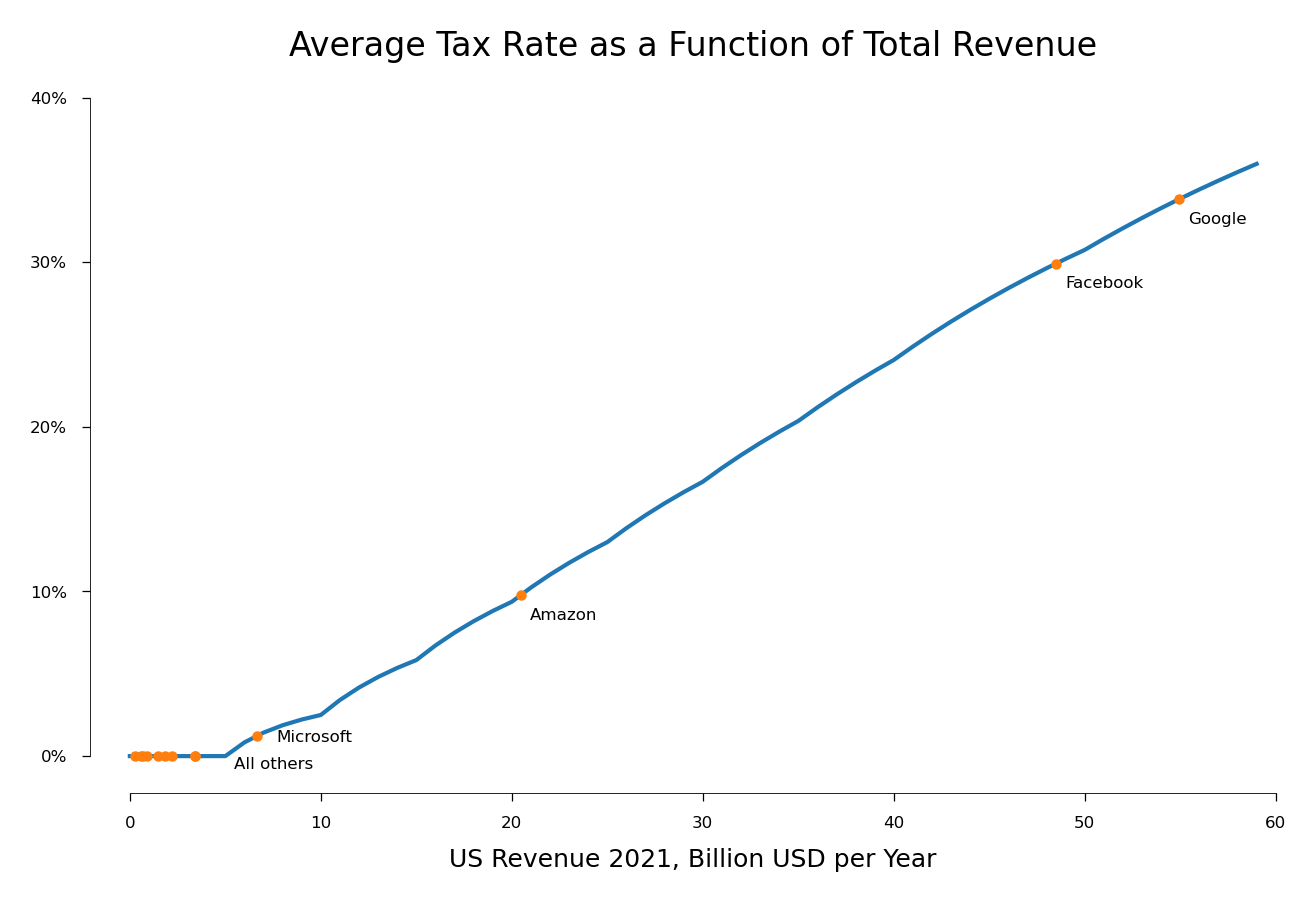

In [5]:
start = time()
result = us(b0, r0, ver = 0)
end = time()
print(end-start)

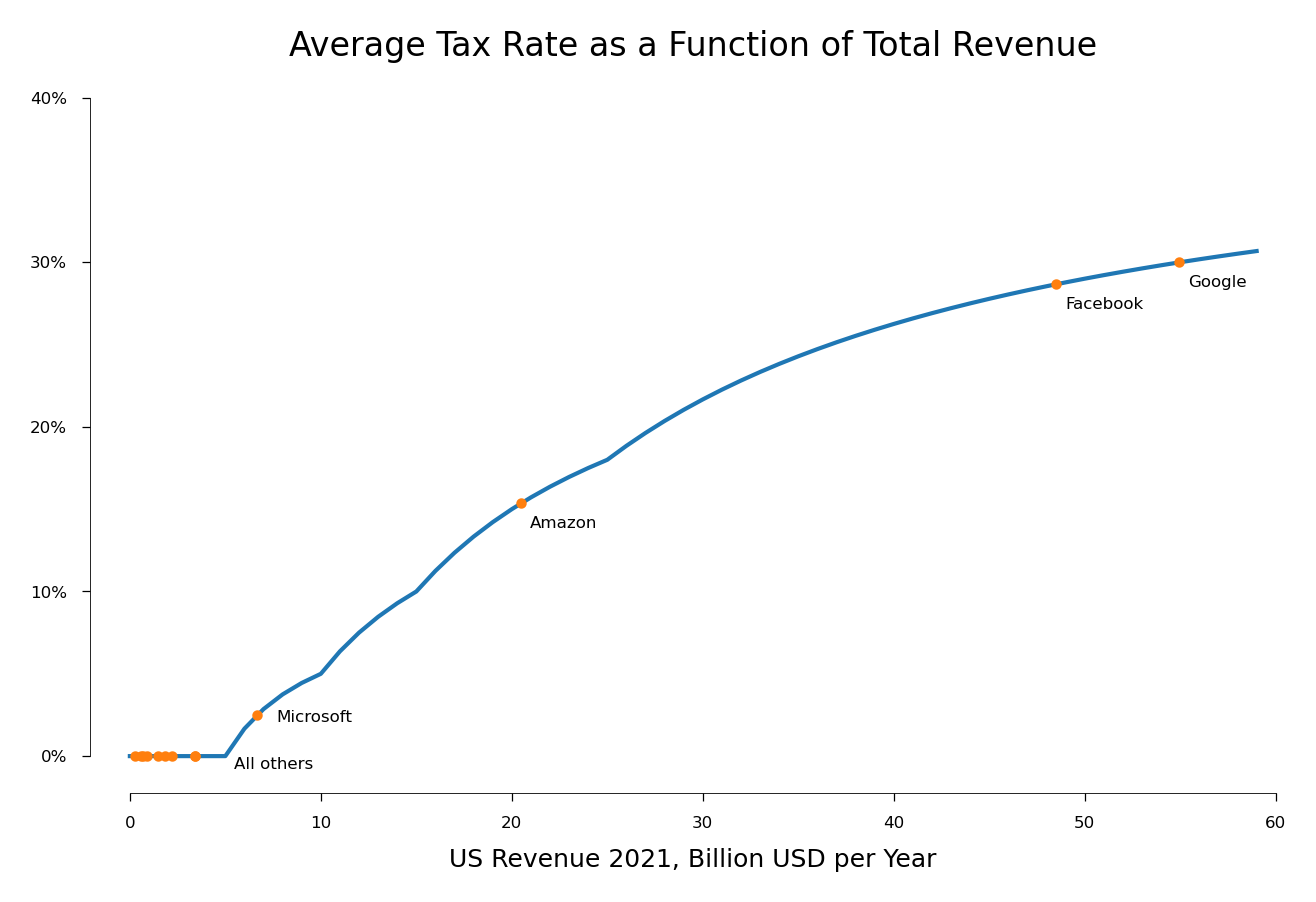

In [6]:
result = us(b1, r1, ver = 1)

### Effect of a split on total tax bill 

In [7]:
def split(s, b, r):
    rv = 50
    tax_bill = s * (ar(rv/s, b, r)* rv/s)
    print(f"Total tax bill: ${tax_bill: 4.1f} billion")
    return

In [8]:
split(1, b0, r0)

Total tax bill: $ 15.4 billion


In [9]:
split(2, b0, r0)

Total tax bill: $ 6.5 billion


In [10]:
split(4, b0, r0)

Total tax bill: $ 2.2 billion


# Alternative Tax Schedule with Lower Max Rate 

In [11]:
# us(b1, r1, ver = 1)


### Similar tax revenue for 2021, but smaller incentive to break up 

In [12]:
split(1, b1, r1)

Total tax bill: $ 14.5 billion


In [13]:
split(2, b1, r1)

Total tax bill: $ 9.0 billion


In [14]:
split(4, b1, r1)

Total tax bill: $ 4.0 billion


# Worldwide

In [15]:
def ww(b,r, ver, adj = None):
    """
    """
    ww_rev_for_graph = range(150)
    ww_ar_for_graph = [ar(x, b, r) for x in ww_rev_for_graph]

    ww_rev = {
        "Amazon": 26309972874.28,
        "Facebook": 107723102210.00,
        "Google": 130145195979.30,
        "IAC": 734739747.00,
        "Microsoft": 8960366731.10,
        "Reddit": 261098903.52,
        "Snapchat": 3206780000.00,
        "Spotify": 1100807642.44,
        "Twitter": 4028869581.75,
        "Verizon Media": 4589668440.03,
        "Yelp": 929364566.42,
    }

    ww_rev_l = list(ww_rev.items())
    ww_rev_s = sorted(ww_rev_l, key=lambda company: company[1], reverse = True)
    ww_names = [ company[0] for company in ww_rev_s ]
    ww_rev_2021 = [ company[1]/10**9 for company in ww_rev_s ]
    ww_avg_r = [ ar(x, b, r) for x in ww_rev_2021]
    
    if adj == None:
        
        adjustments = [
            (+1, -1.5, "", 0),
            (+1, -1.5, "", 1),
            (+1, -1.5, "", 2),
           (+2.0, -1, "All others", 3)
        ]

#         adjustments = [
#             (+1, -1.5, "", 0),
#             (+1, -1.5, "", 1),
#             (+1, -1.5, "", 2),
#             (+2.0, -0.4, "", 3),
#             (+2.0, -0.4, "", 4),
#             (+2.0, -1, "", 5),
#             (+2.0, -0.4, "", 6),
#             (+2.0, 0, "", 7),
#             (+2.0, -0.4, ",", 8),
#             (+9.5, -0.4, ",", 9),
#             (+16, -0.4, "", 10)    
#         ]
    else: 
        adjustments = adj

    with plt.style.context(base_style):
        fig = plt.figure()
        ax = fig.add_axes([0.2, 0.2, 0.6, 0.6])
        ax = floating_spines(ax)
        ax.set_xlim(-1, 150)
        ax.set_ylim(-0.01,0.6)
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1.0, decimals = 0))
        ax.spines['bottom'].set_bounds(low = 0, high = 150)
        ax.spines['left'].set_bounds(low = 0, high = 0.6)
        ax.plot(ww_rev_for_graph, ww_ar_for_graph)
        ax.plot(ww_rev_2021, ww_avg_r, ls = '', marker = 'o', ms = 1.5)
        for j in range(len(adjustments)):
            if adjustments[j][2] == "All others":
                ax.text(ww_rev_2021[j] + adjustments[j][0], ww_avg_r[j] + adjustments[j][1]/100, adjustments[j][2], fontsize = 4) 
            else:  
                ax.text(ww_rev_2021[j] + adjustments[j][0], ww_avg_r[j] + adjustments[j][1]/100, ww_names[j] + adjustments[j][2], fontsize = 4) 

        ax.set_title("Average Tax Rate as a Function of Total Revenue", pad = 10)
        ax.axes.xaxis.set_label_text("Worldwide Revenue 2021, Billion USD per Year")
            
    fig.savefig("ww_" + str(ver) + ".pdf")
    return 


### Double the brackets for a tax applied to WW Income

In [16]:
# bracket thresholds
b0 = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60]
b2 = [ 2* b for b in b0]
# rates
r0 = [0, 0.05, 0.125, 0.20, 0.275, 0.35, 0.425, 0.50, 0.575, 0.65, 0.725 ]
r2 = r0
len(b2) == len(r2)

True

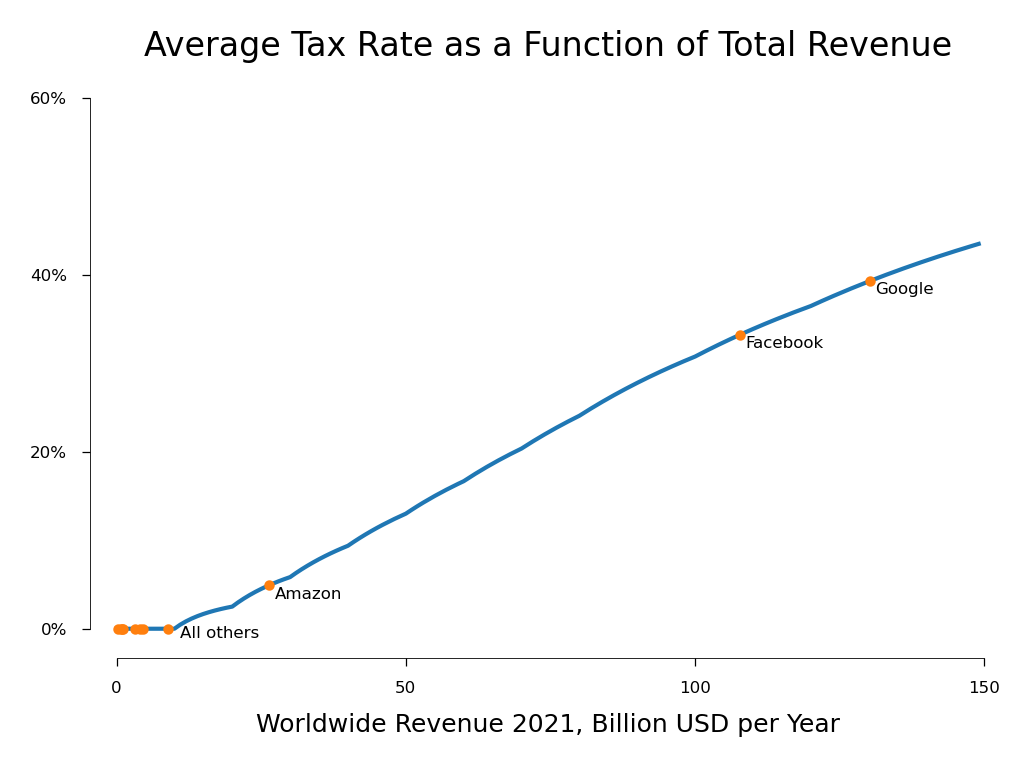

In [17]:
ww(b2,r2, ver = 2)

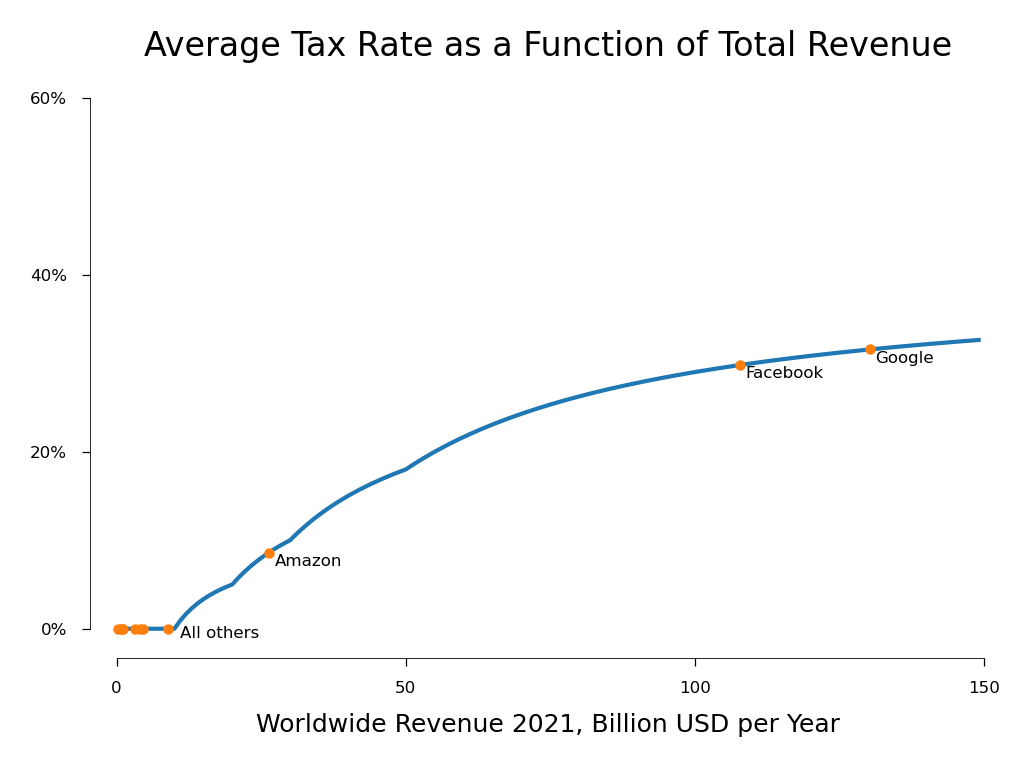

In [18]:
b3 = [2*b for b in b1]
r3 = r1


ww(b3,r3, ver = 3)